In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
from matplotlib.patches import Patch
from matplotlib.ticker import PercentFormatter
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets\\Family Income and Expenditure.csv')

In [3]:
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [4]:
df.isnull().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

In [5]:
df.dtypes

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

<h1 style="text-align: center; color: red;">INSIGHT 1
</h1>

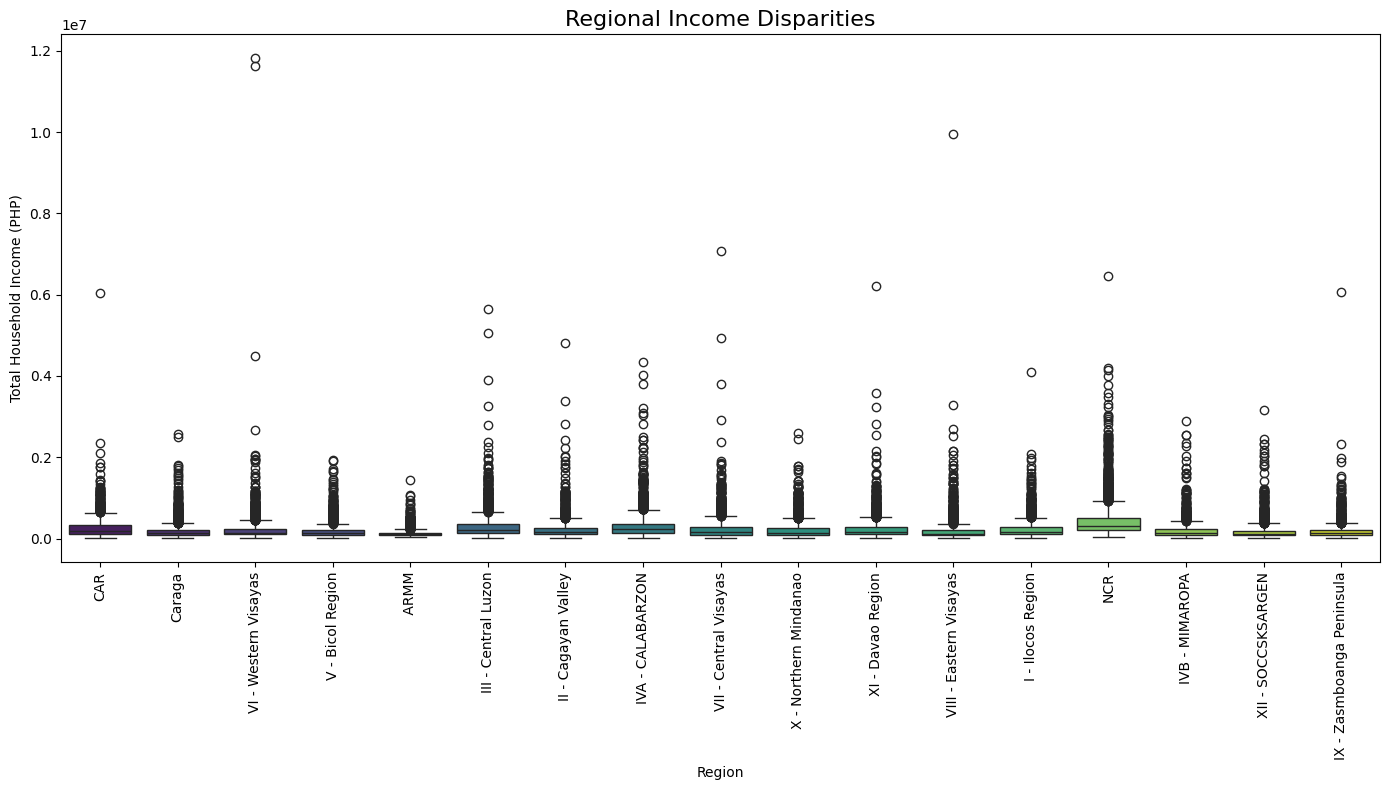

In [6]:
# 1. INSIGHT: Regional Income Disparities
plt.figure(figsize=(14, 8))
sns.boxplot(x='Region', y='Total Household Income', data=df, palette='viridis')
plt.title('Regional Income Disparities', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Total Household Income (PHP)')
plt.tight_layout()
plt.savefig('1_regional_income_disparities.png', dpi=300, bbox_inches='tight')
plt.show()

<h3>Insight 1</h3>
<h4>The boxplot reveals significant income inequality across different regions of the Philippines. Urban regions likely show higher median incomes with wider distributions, suggesting greater economic opportunities but also more extreme wealth gaps within these areas. Rural regions demonstrate lower median incomes with narrower distributions, indicating more economic homogeneity but fewer high-income outliers. These patterns highlight how geographic location remains a fundamental determinant of economic opportunity and standard of living in the Philippines.</h4>

<h1 style="text-align: center; color: red;">INSIGHT 2
</h1>

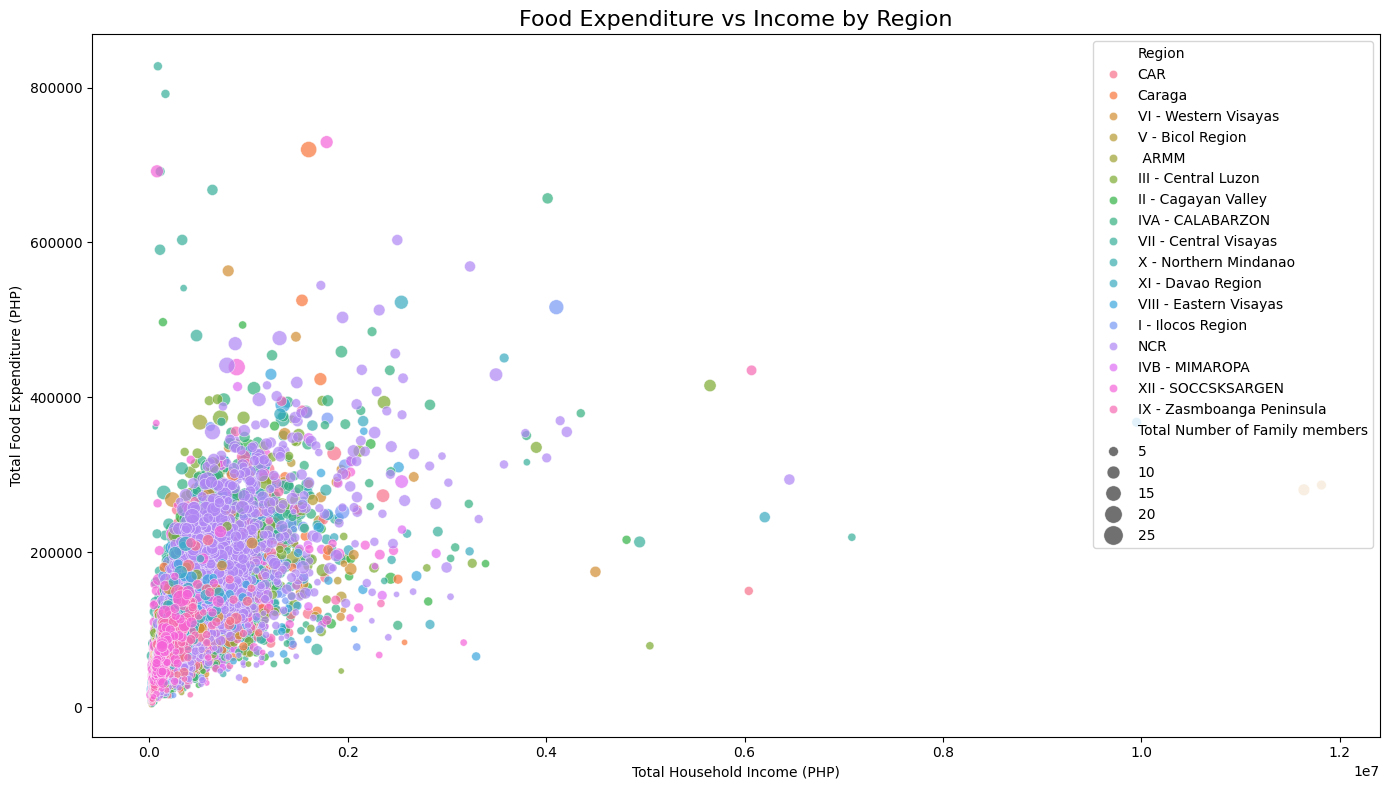

In [8]:
# 2. INSIGHT: Food Expenditure vs Income by Region
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Total Household Income', y='Total Food Expenditure', 
               hue='Region', size='Total Number of Family members',
               sizes=(20, 200), alpha=0.7, data=df)
plt.title('Food Expenditure vs Income by Region', fontsize=16)
plt.xlabel('Total Household Income (PHP)')
plt.ylabel('Total Food Expenditure (PHP)')
plt.tight_layout()
plt.savefig('2_food_expenditure_vs_income.png', dpi=300, bbox_inches='tight')
plt.show()

<h1 style="text-align: center; color: red;">INSIGHT 3
</h1>

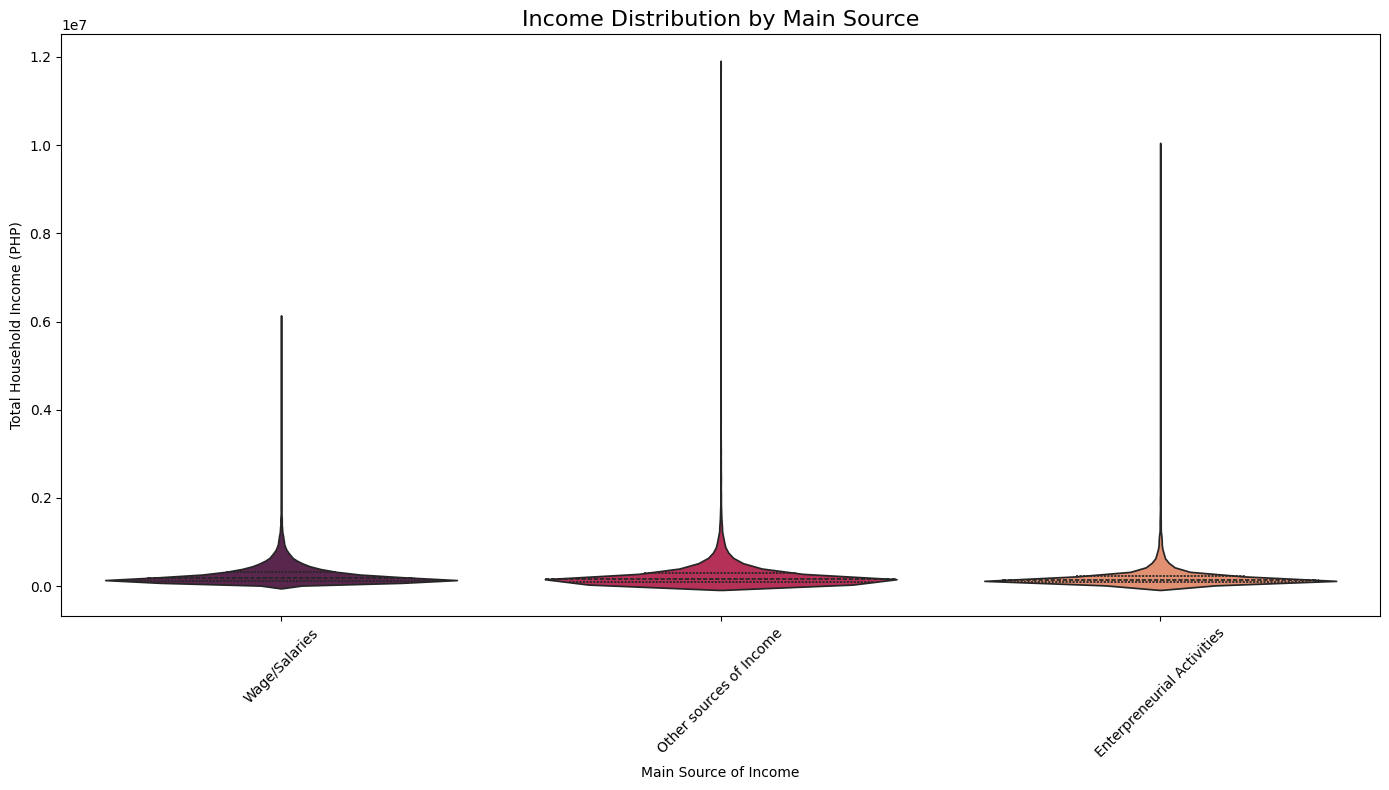

In [9]:
# 3. INSIGHT: Income Distribution by Main Source
plt.figure(figsize=(14, 8))
sns.violinplot(x='Main Source of Income', y='Total Household Income', 
              data=df, palette='rocket', inner='quartile')
plt.title('Income Distribution by Main Source', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Total Household Income (PHP)')
plt.tight_layout()
plt.savefig('3_income_distribution_by_source.png', dpi=300, bbox_inches='tight')
plt.show()


<h1 style="text-align: center; color: red;">INSIGHT 4
</h1>

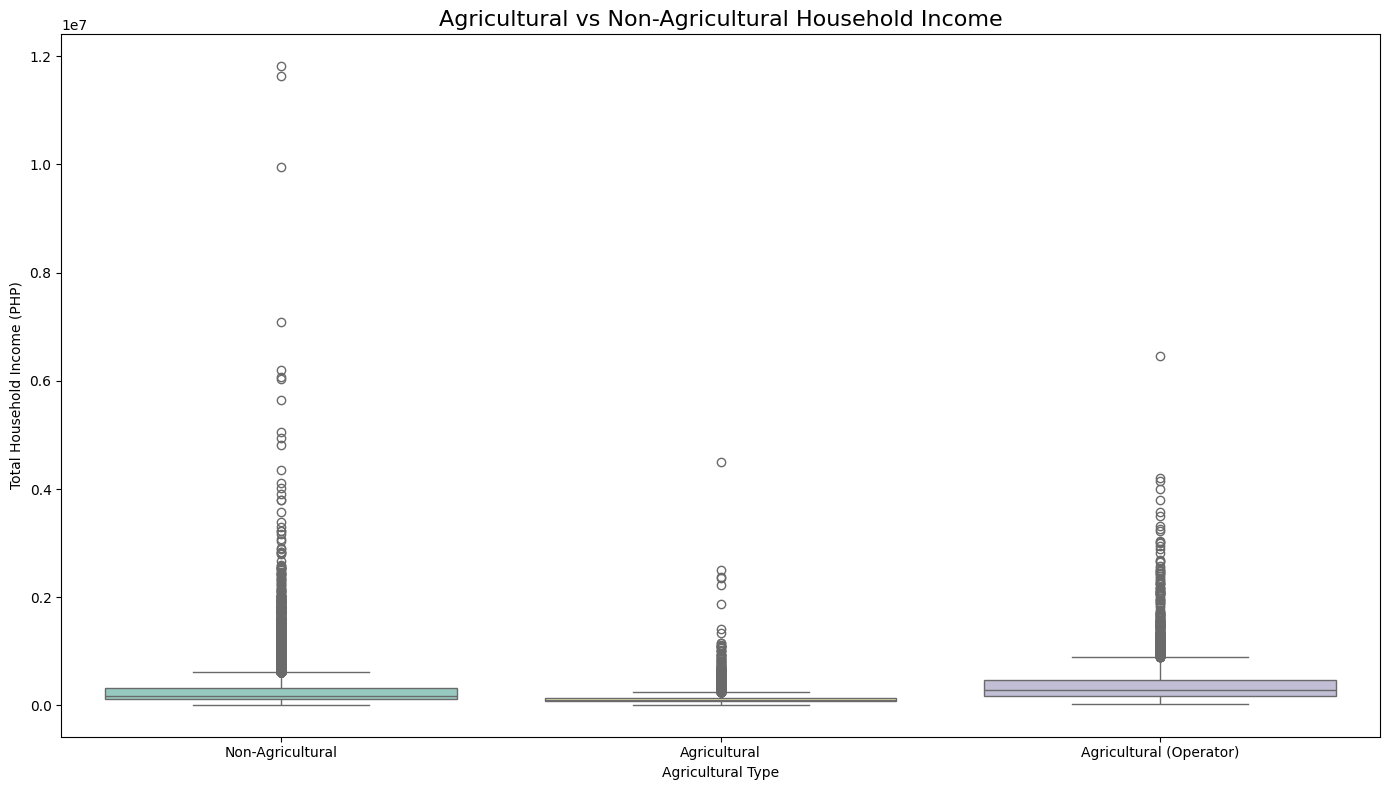

In [10]:
# 4. INSIGHT: Agricultural vs Non-Agricultural Household Income
plt.figure(figsize=(14, 8))
df['Agricultural Type'] = df['Agricultural Household indicator'].map({0: 'Non-Agricultural', 
                                                                    1: 'Agricultural', 
                                                                    2: 'Agricultural (Operator)' if 2 in df['Agricultural Household indicator'].unique() else np.nan})
sns.boxplot(x='Agricultural Type', y='Total Household Income', data=df, palette='Set3')
plt.title('Agricultural vs Non-Agricultural Household Income', fontsize=16)
plt.ylabel('Total Household Income (PHP)')
plt.tight_layout()
plt.savefig('4_agricultural_vs_non_agricultural.png', dpi=300, bbox_inches='tight')
plt.show()

<h1 style="text-align: center; color: red;">INSIGHT 5
</h1>

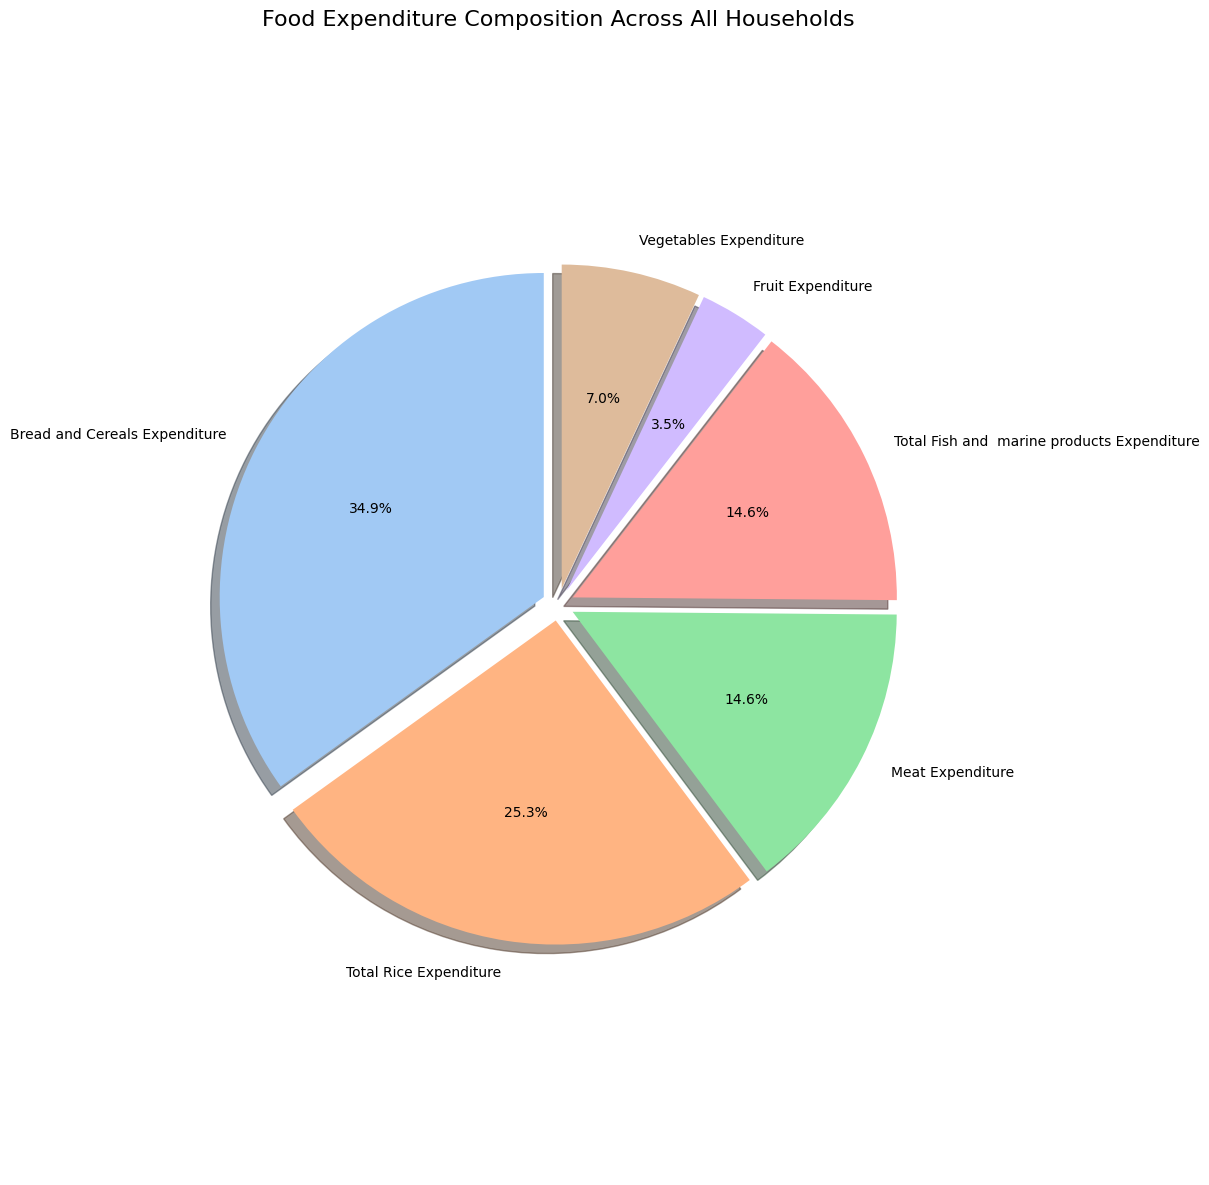

In [11]:
# 5. INSIGHT: Food Expenditure Composition
food_cols = ['Bread and Cereals Expenditure', 'Total Rice Expenditure', 'Meat Expenditure', 
            'Total Fish and  marine products Expenditure', 'Fruit Expenditure', 'Vegetables Expenditure']
food_data = df[food_cols].sum()
plt.figure(figsize=(12, 12))
plt.pie(food_data, labels=food_cols, autopct='%1.1f%%', startangle=90, shadow=True, 
       explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05], colors=sns.color_palette('pastel'))
plt.title('Food Expenditure Composition Across All Households', fontsize=16)
plt.axis('equal')  
plt.tight_layout()
plt.savefig('5_food_expenditure_composition.png', dpi=300, bbox_inches='tight')
plt.show()

<h1 style="text-align: center; color: red;">INSIGHT 6
</h1>

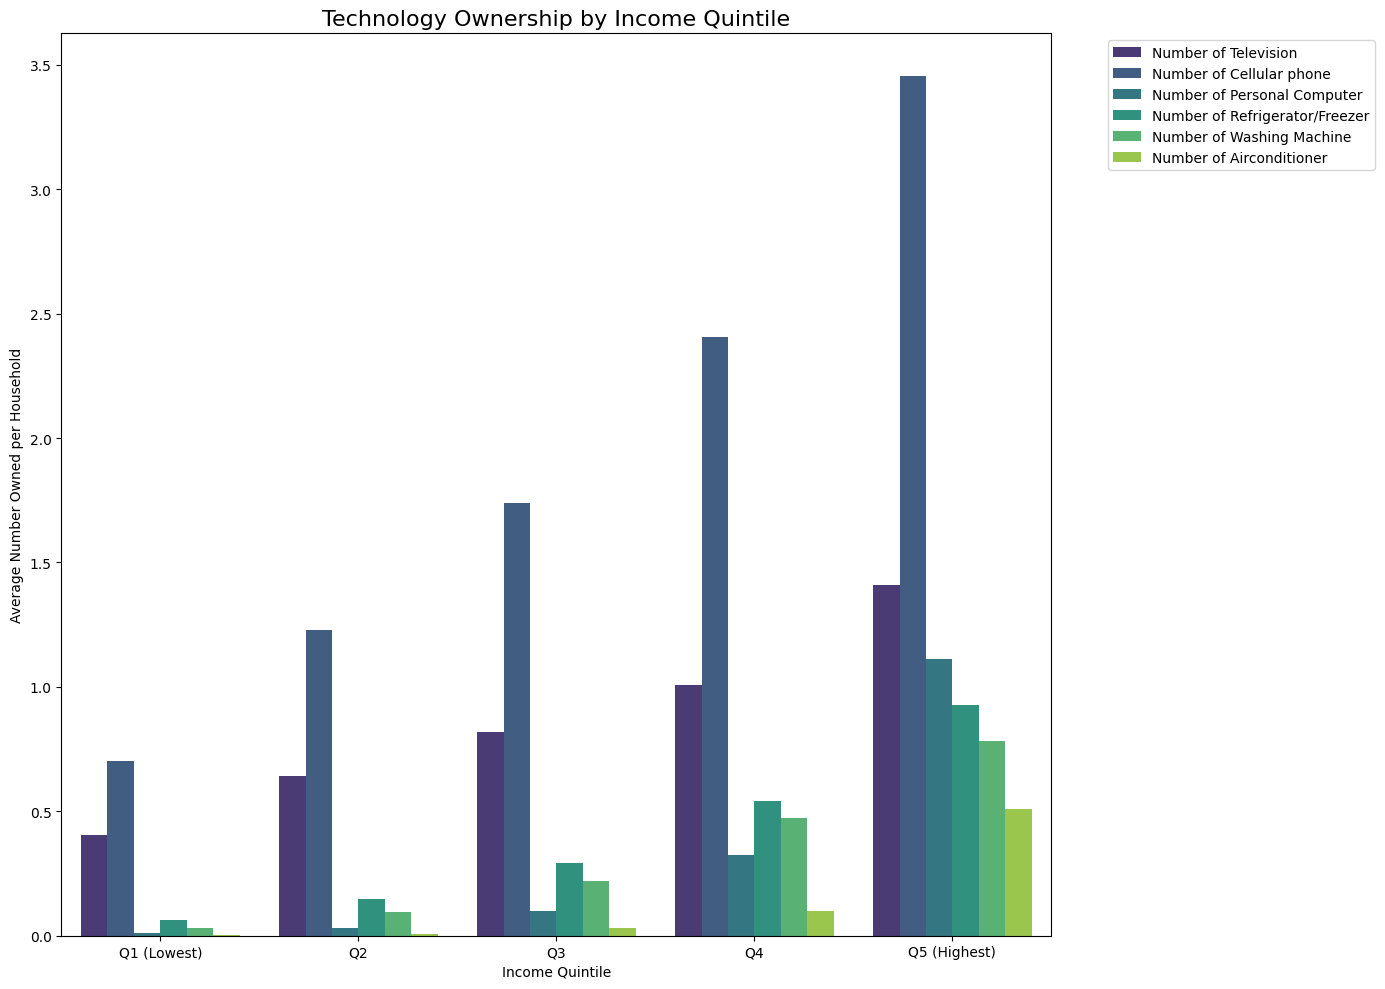

In [12]:
# 6. INSIGHT: Digital Divide: Tech Ownership by Income Level
# Create income quintiles
df['Income Quintile'] = pd.qcut(df['Total Household Income'], 5, labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4', 'Q5 (Highest)'])

# Technology variables
tech_vars = ['Number of Television', 'Number of Cellular phone', 'Number of Personal Computer', 
             'Number of Refrigerator/Freezer', 'Number of Washing Machine', 'Number of Airconditioner']

# Calculate average ownership by quintile
tech_ownership = df.groupby('Income Quintile')[tech_vars].mean().reset_index()

# Melt for plotting
tech_melt = pd.melt(tech_ownership, id_vars='Income Quintile', 
                   value_vars=tech_vars, var_name='Technology', value_name='Average Ownership')

plt.figure(figsize=(14, 10))
sns.barplot(x='Income Quintile', y='Average Ownership', hue='Technology', data=tech_melt, palette='viridis')
plt.title('Technology Ownership by Income Quintile', fontsize=16)
plt.xlabel('Income Quintile')
plt.ylabel('Average Number Owned per Household')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('6_digital_divide.png', dpi=300, bbox_inches='tight')
plt.show()

<h1 style="text-align: center; color: red;">INSIGHT 7
</h1>

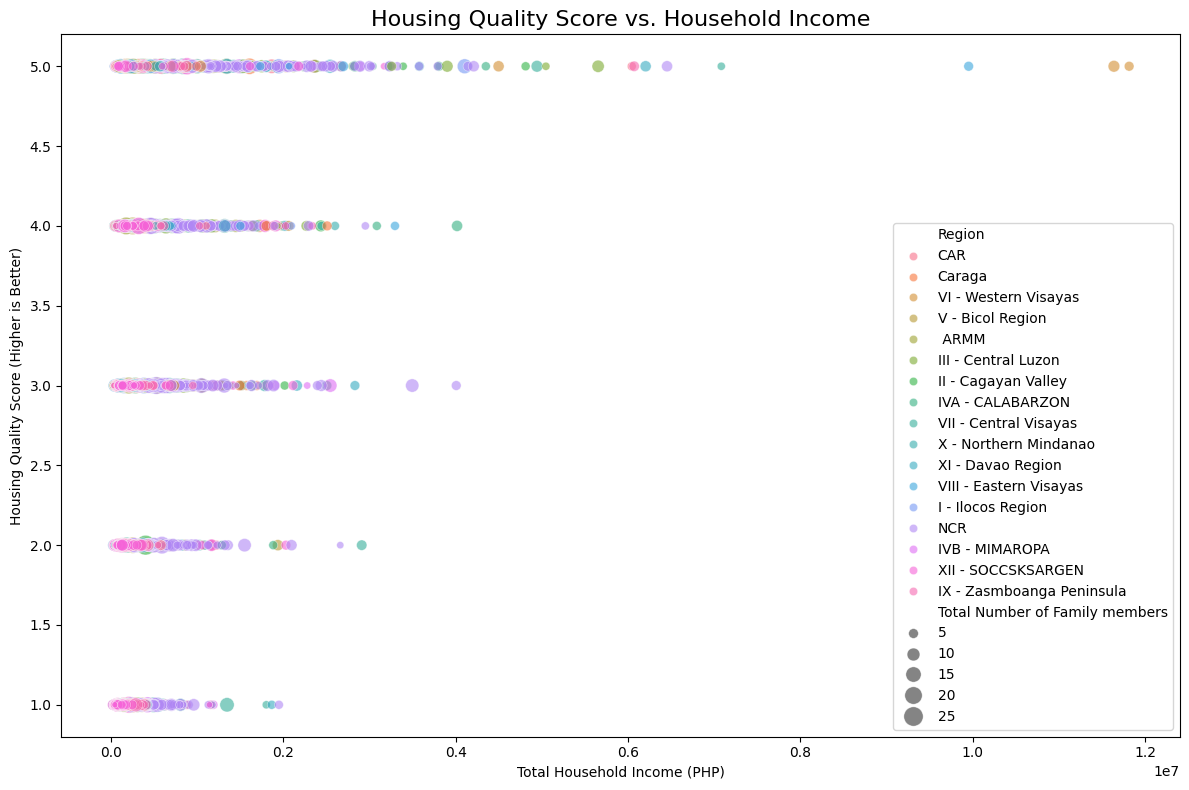

In [13]:
# 7. INSIGHT: Housing Quality and Income
# Create a housing quality score based on housing variables
df['Housing Quality Score'] = (df['Type of Building/House'].map({'Single House': 3, 
                                                                'Duplex': 2, 
                                                                'Apartment/Accessoria/Condominium': 2, 
                                                                'Other': 1}) if 'Single House' in df['Type of Building/House'].unique() else 0)

df['Housing Quality Score'] += (df['Type of Roof'].map({'Strong Materials (Galvanized Iron, Aluminum, Tile, Concrete, Brick, Stone, Asbestos)': 3, 
                                                       'Light Materials (Cogon, Nipa, Anahaw)': 1, 
                                                       'Mixed but predominantly strong materials': 2,
                                                       'Mixed but predominantly light materials': 1}) if 'Strong Materials (Galvanized Iron, Aluminum, Tile, Concrete, Brick, Stone, Asbestos)' in df['Type of Roof'].unique() else 0)

df['Housing Quality Score'] += (df['Type of Walls'].map({'Strong Materials (Concrete, Brick, Stone, Wood, Plywood, Galvanized Iron, Aluminum)': 3, 
                                                        'Light Materials (Bamboo, Sawali, Cogon, Nipa)': 1, 
                                                        'Mixed but predominantly strong materials': 2,
                                                        'Mixed but predominantly light materials': 1, 
                                                        'Makeshift/Salvaged/Improvised Materials': 0}) if 'Strong Materials (Concrete, Brick, Stone, Wood, Plywood, Galvanized Iron, Aluminum)' in df['Type of Walls'].unique() else 0)

# Check house area and add to score
# Let's assume house area is already numerical
df['Housing Quality Score'] += pd.qcut(df['House Floor Area'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total Household Income', y='Housing Quality Score', 
               hue='Region', size='Total Number of Family members',
               sizes=(20, 200), alpha=0.6, data=df)
plt.title('Housing Quality Score vs. Household Income', fontsize=16)
plt.xlabel('Total Household Income (PHP)')
plt.ylabel('Housing Quality Score (Higher is Better)')
plt.tight_layout()
plt.savefig('7_housing_quality_income.png', dpi=300, bbox_inches='tight')
plt.show()

<h1 style="text-align: center; color: red;">INSIGHT 8
</h1>

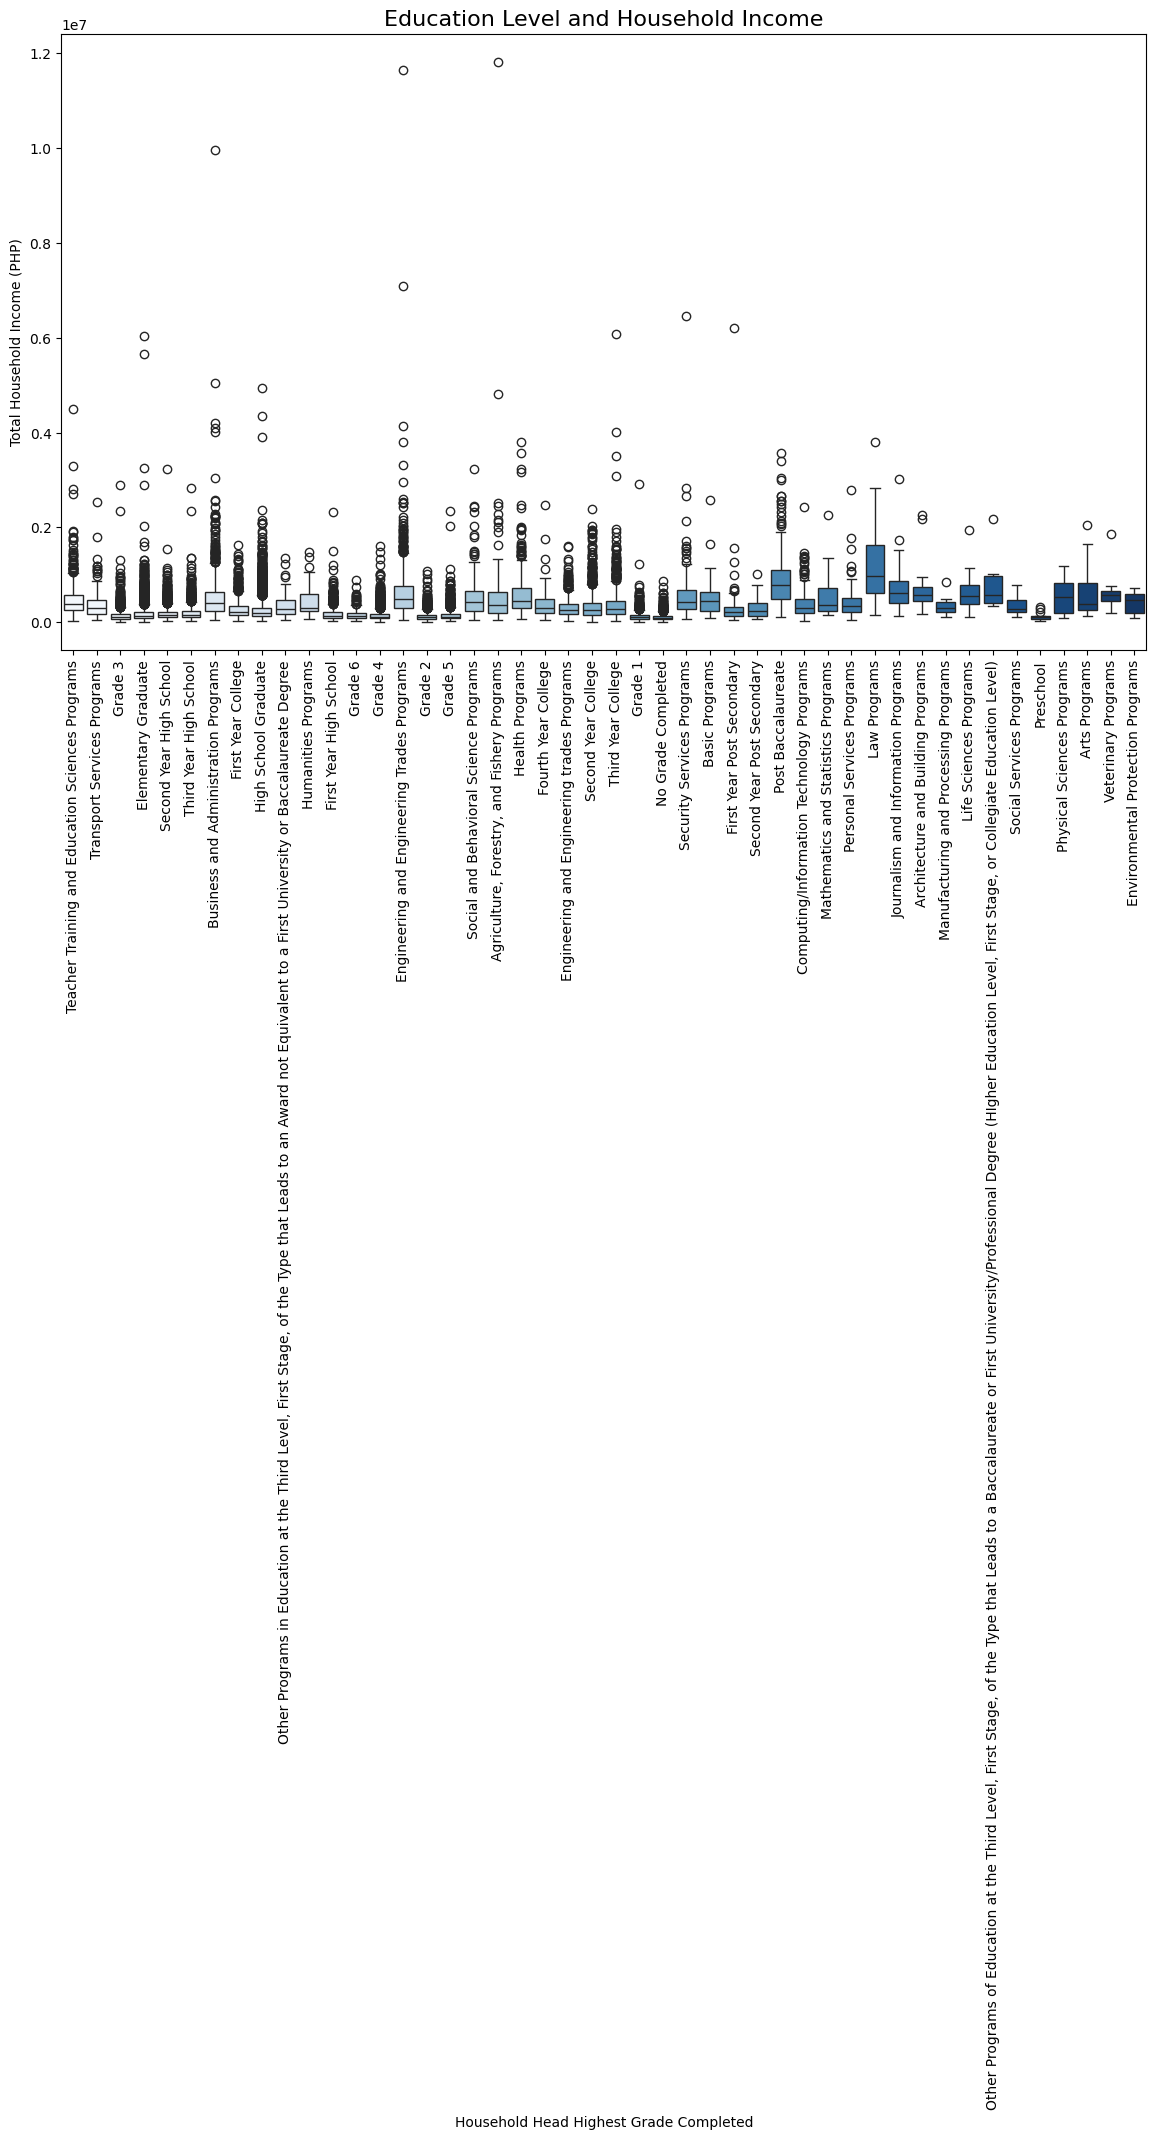

In [14]:
# 8. INSIGHT: Education's Impact on Income
plt.figure(figsize=(14, 8))
education_order = ['No Grade Completed', 'Elementary Undergraduate', 'Elementary Graduate', 
                  'High School Undergraduate', 'High School Graduate', 
                  'College Undergraduate', 'College Graduate', 'Post Graduate']
if all(edu in df['Household Head Highest Grade Completed'].unique() for edu in education_order):
    sns.boxplot(x='Household Head Highest Grade Completed', y='Total Household Income', 
                data=df, order=education_order, palette='Blues')
else:
    # Use whatever education categories are available
    sns.boxplot(x='Household Head Highest Grade Completed', y='Total Household Income', 
                data=df, palette='Blues')
plt.title('Education Level and Household Income', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Total Household Income (PHP)')
plt.tight_layout()
plt.savefig('8_education_impact.png', dpi=300, bbox_inches='tight')
plt.show()

<h1 style="text-align: center; color: red;">INSIGHT 9
</h1>

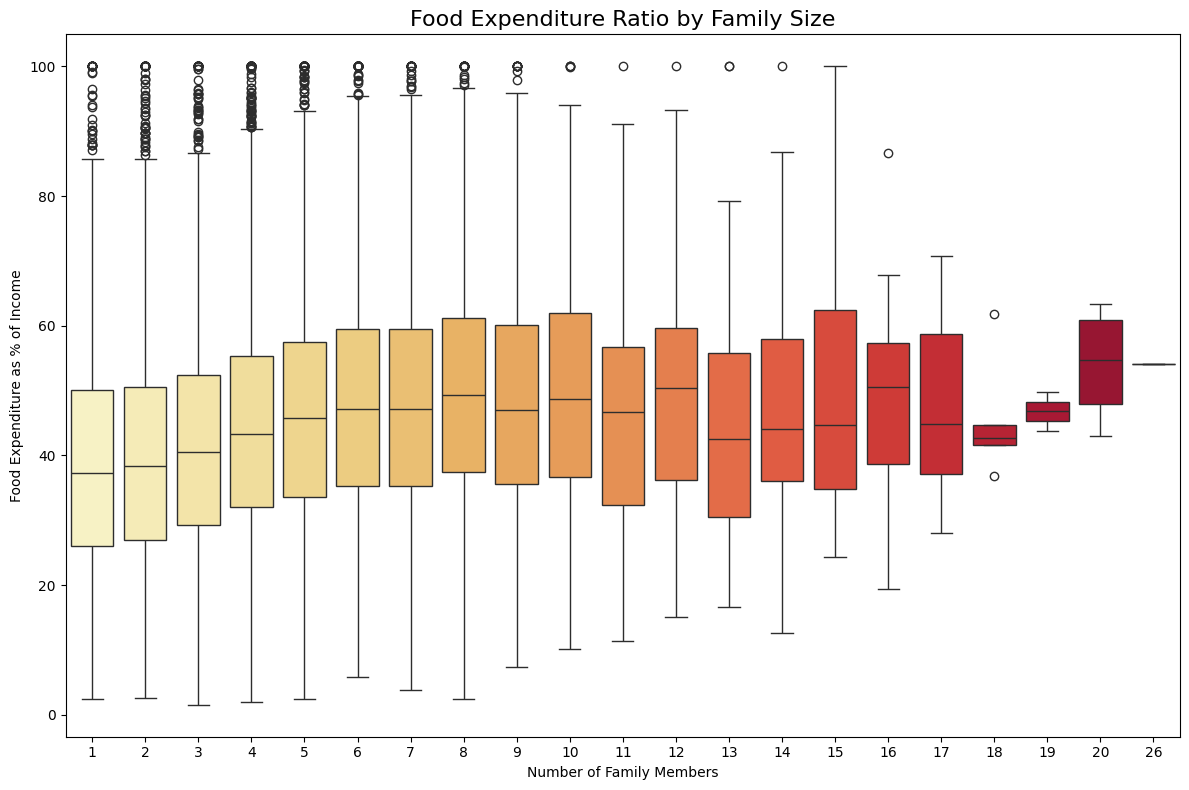

In [15]:
# 9. INSIGHT: Family Size and Food Expenditure Ratio
# Calculate food expenditure as percentage of income
df['Food Expenditure Ratio'] = (df['Total Food Expenditure'] / df['Total Household Income']) * 100
df['Food Expenditure Ratio'] = df['Food Expenditure Ratio'].clip(upper=100)  # Cap at 100% for visualization

plt.figure(figsize=(12, 8))
sns.boxplot(x='Total Number of Family members', y='Food Expenditure Ratio', data=df, palette='YlOrRd')
plt.title('Food Expenditure Ratio by Family Size', fontsize=16)
plt.xlabel('Number of Family Members')
plt.ylabel('Food Expenditure as % of Income')
plt.tight_layout()
plt.savefig('9_food_expenditure_ratio.png', dpi=300, bbox_inches='tight')
plt.show()

<h1 style="text-align: center; color: red;">INSIGHT 10
</h1>

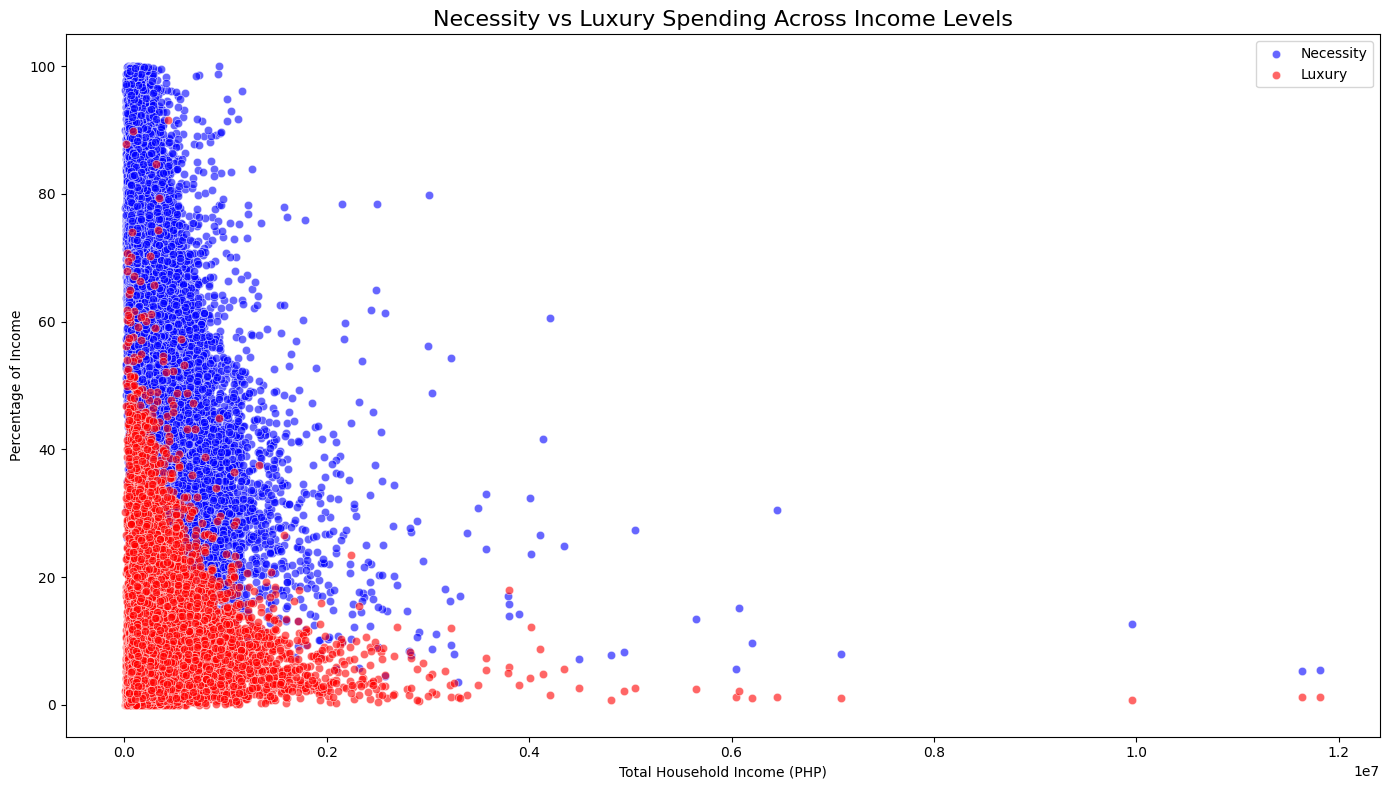

In [17]:
# 10. INSIGHT: Luxury vs Necessity Spending Across Income Groups
# Create columns for luxury and necessity spending
df['Necessity Spending'] = df['Total Food Expenditure'] + df['Housing and water Expenditure'] + df['Medical Care Expenditure']
df['Luxury Spending'] = df['Restaurant and hotels Expenditure'] + df['Special Occasions Expenditure'] + df['Alcoholic Beverages Expenditure']
df['Necessity Ratio'] = (df['Necessity Spending'] / df['Total Household Income']) * 100
df['Luxury Ratio'] = (df['Luxury Spending'] / df['Total Household Income']) * 100

# Use only valid ratios for visualization (less than 100%)
luxury_necessity_df = df[(df['Necessity Ratio'] <= 100) & (df['Luxury Ratio'] <= 100)]

plt.figure(figsize=(14, 8))
sns.scatterplot(x='Total Household Income', y='Necessity Ratio', 
               label='Necessity', color='blue', alpha=0.6, data=luxury_necessity_df)
sns.scatterplot(x='Total Household Income', y='Luxury Ratio', 
               label='Luxury', color='red', alpha=0.6, data=luxury_necessity_df)

plt.title('Necessity vs Luxury Spending Across Income Levels', fontsize=16)
plt.xlabel('Total Household Income (PHP)')
plt.ylabel('Percentage of Income')
plt.tight_layout()
plt.savefig('10_luxury_vs_necessity.png', dpi=300, bbox_inches='tight')
plt.show()

<h1 style="text-align: center; color: red;">INSIGHT 11
</h1>

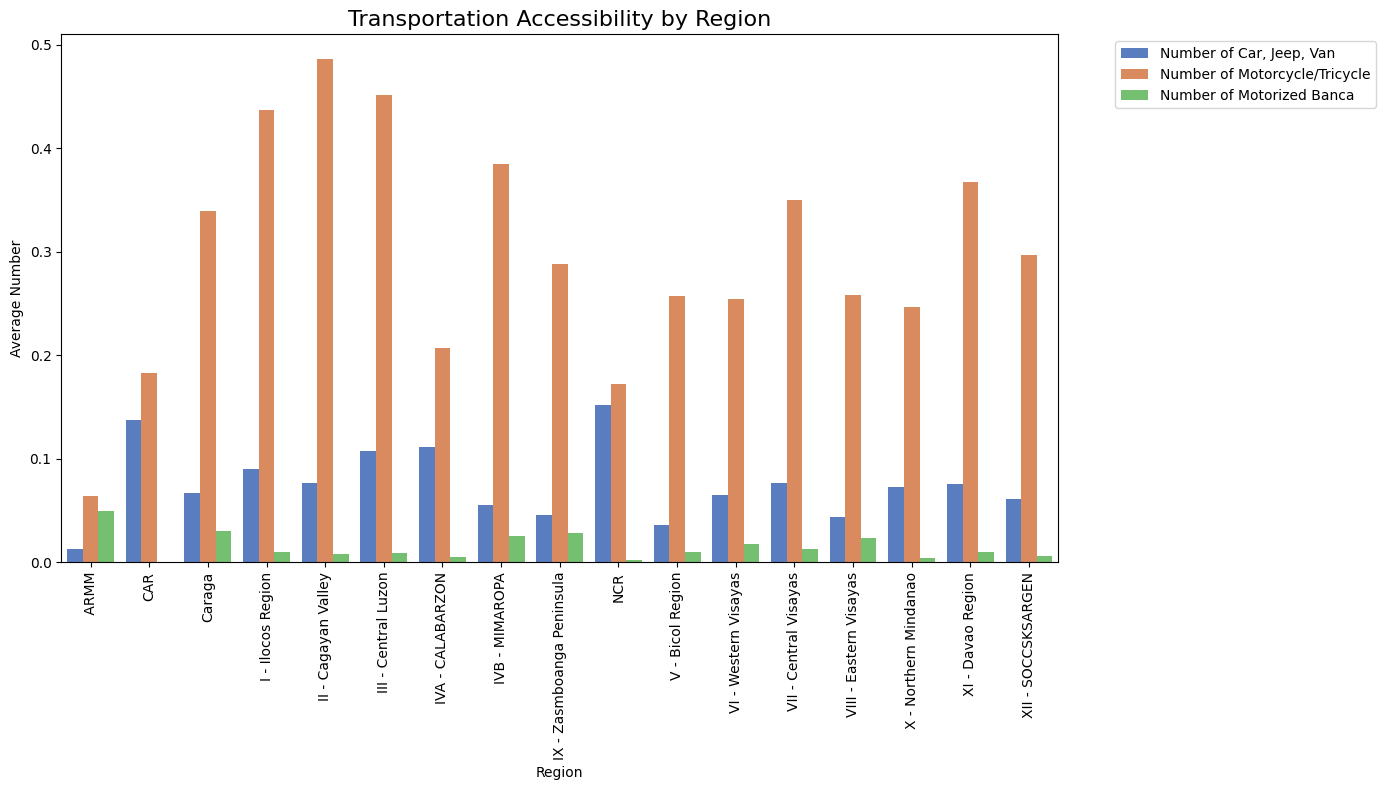

In [18]:
# 11. INSIGHT: Transportation Accessibility by Region
plt.figure(figsize=(14, 8))
vehicles = df.groupby('Region')[['Number of Car, Jeep, Van', 'Number of Motorcycle/Tricycle', 'Number of Motorized Banca']].mean()
vehicles = vehicles.reset_index()
vehicles_melted = pd.melt(vehicles, id_vars='Region', var_name='Vehicle Type', value_name='Average Number')

sns.barplot(x='Region', y='Average Number', hue='Vehicle Type', data=vehicles_melted, palette='muted')
plt.title('Transportation Accessibility by Region', fontsize=16)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('11_transportation_accessibility.png', dpi=300, bbox_inches='tight')
plt.show()

<h1 style="text-align: center; color: red;">INSIGHT 12
</h1>

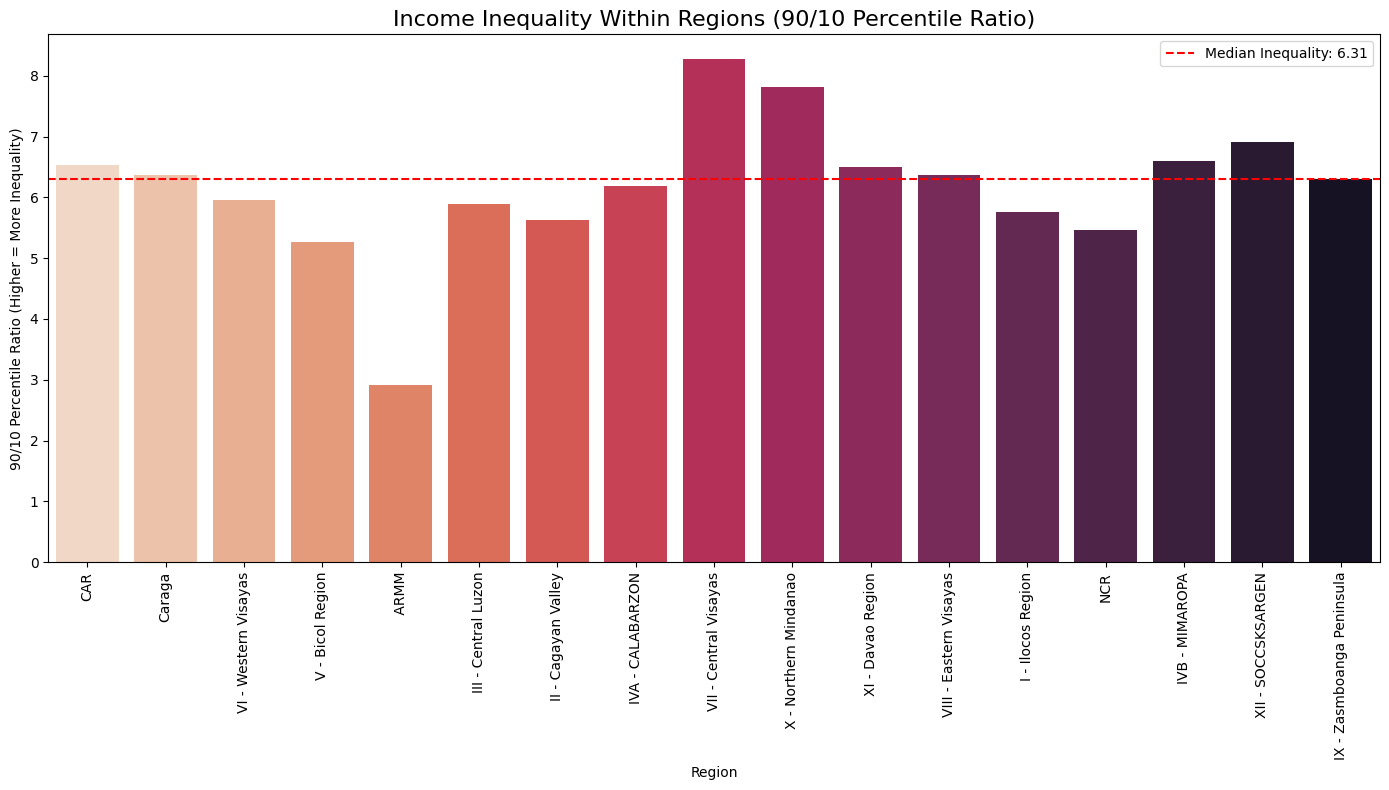

In [19]:
# 12. INSIGHT: Income Inequality Within Regions
# Calculate Gini coefficient-like measure for each region
regions = df['Region'].unique()
region_inequality = []

for region in regions:
    region_data = df[df['Region'] == region]['Total Household Income'].sort_values()
    n = len(region_data)
    if n > 0:  # Ensure there's data for this region
        # Calculate a simplified inequality measure
        region_90_10 = region_data.quantile(0.9) / region_data.quantile(0.1)
        region_inequality.append({'Region': region, 'Income Inequality': region_90_10})

inequality_df = pd.DataFrame(region_inequality)

plt.figure(figsize=(14, 8))
sns.barplot(x='Region', y='Income Inequality', data=inequality_df, palette='rocket_r')
plt.title('Income Inequality Within Regions (90/10 Percentile Ratio)', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('90/10 Percentile Ratio (Higher = More Inequality)')
plt.axhline(y=inequality_df['Income Inequality'].median(), color='red', linestyle='--', 
           label=f'Median Inequality: {inequality_df["Income Inequality"].median():.2f}')
plt.legend()
plt.tight_layout()
plt.savefig('12_income_inequality.png', dpi=300, bbox_inches='tight')
plt.show()

<h1 style="text-align: center; color: red;">INSIGHT 13
</h1>

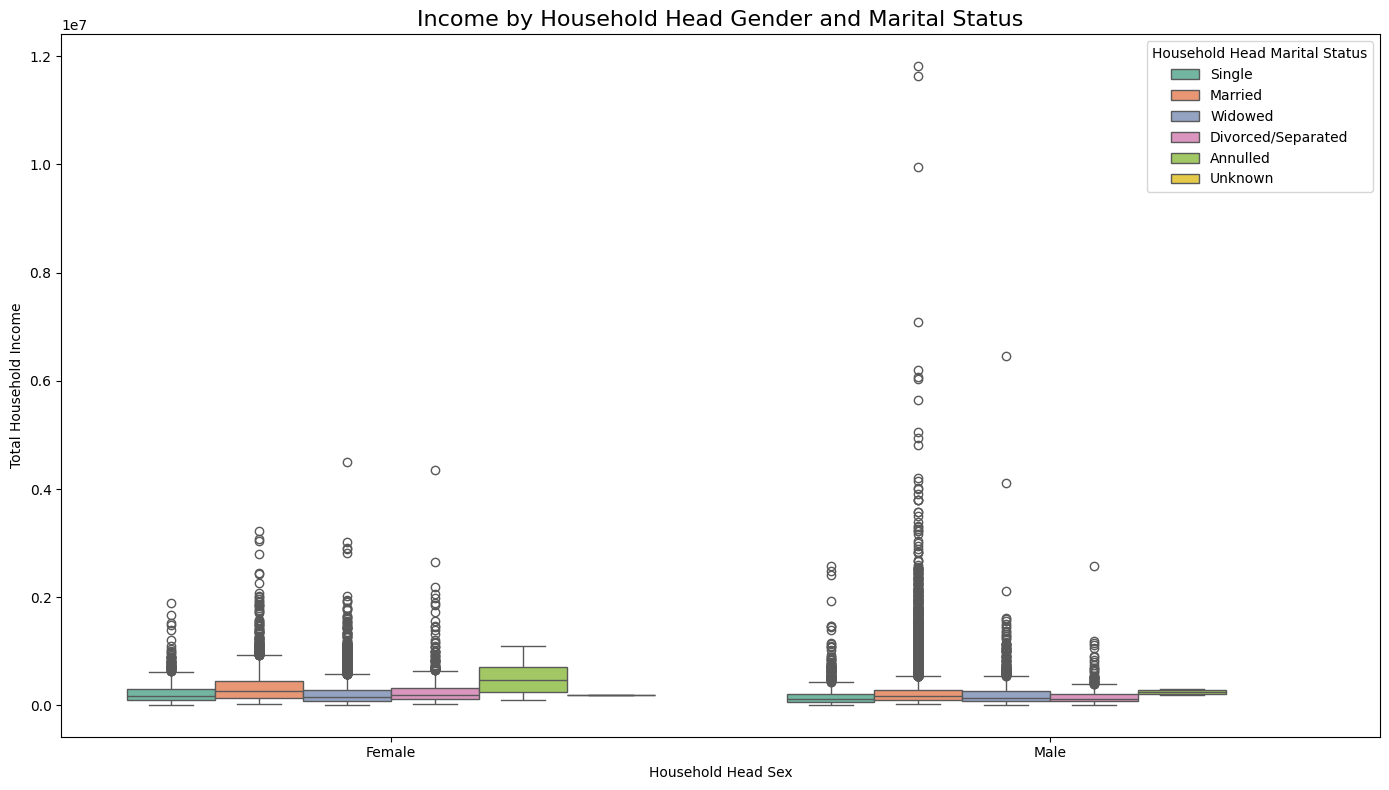

In [20]:
# 13. INSIGHT: Household Head Characteristics and Income
plt.figure(figsize=(14, 8))
# Check if 'Household Head Sex' contains typical values, otherwise use as-is
if all(gender in df['Household Head Sex'].unique() for gender in ['Male', 'Female']):
    gender_map = {'Male': 'Male', 'Female': 'Female'}
else:
    gender_map = {val: val for val in df['Household Head Sex'].unique()}

sns.boxplot(x='Household Head Sex', y='Total Household Income', 
           hue='Household Head Marital Status', data=df, palette='Set2')
plt.title('Income by Household Head Gender and Marital Status', fontsize=16)
plt.tight_layout()
plt.savefig('13_household_head_characteristics.png', dpi=300, bbox_inches='tight')
plt.show()

<h1 style="text-align: center; color: red;">INSIGHT 14
</h1>

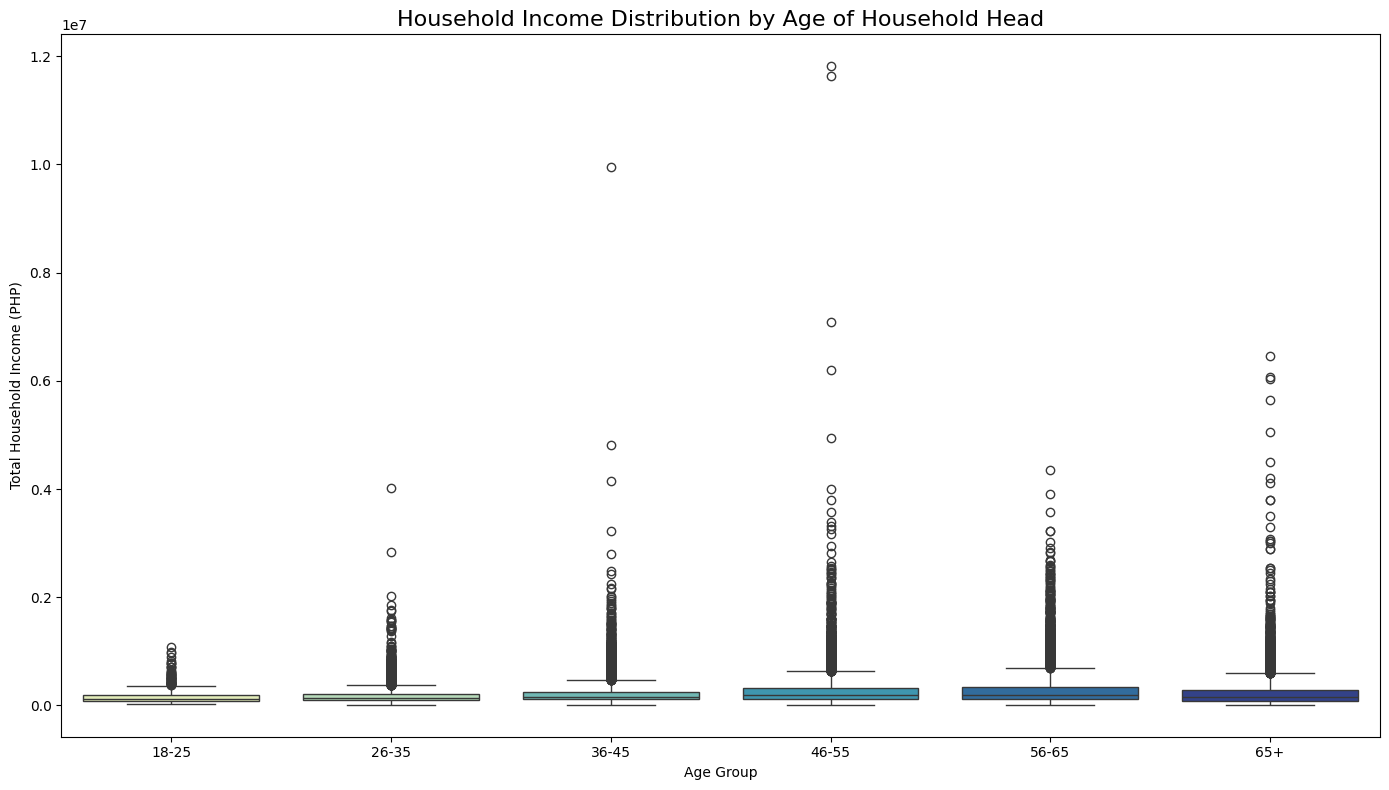

In [21]:
# 14. INSIGHT: Age of Household Head and Income
plt.figure(figsize=(14, 8))
# Create age groups
df['Age Group'] = pd.cut(df['Household Head Age'], 
                         bins=[0, 25, 35, 45, 55, 65, 100], 
                         labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

sns.boxplot(x='Age Group', y='Total Household Income', data=df, palette='YlGnBu')
plt.title('Household Income Distribution by Age of Household Head', fontsize=16)
plt.ylabel('Total Household Income (PHP)')
plt.tight_layout()
plt.savefig('14_age_income_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

<h1 style="text-align: center; color: red;">INSIGHT 15
</h1>

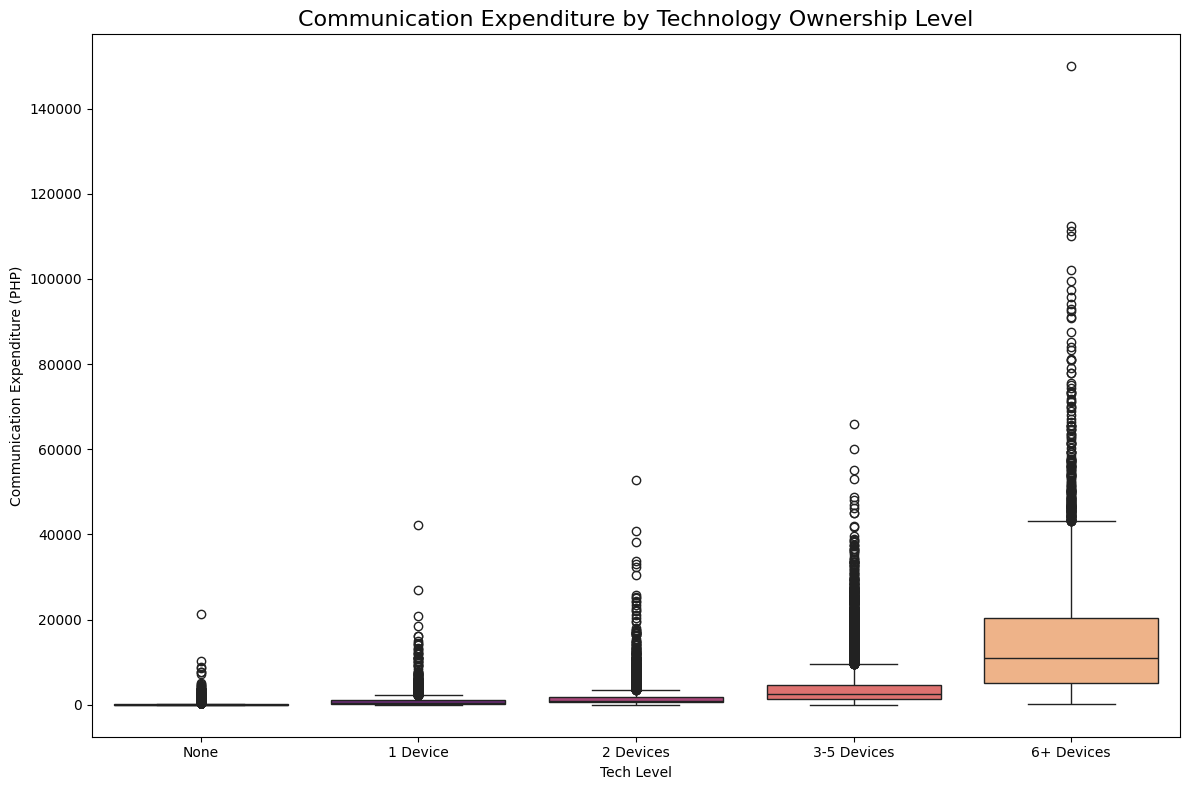

In [22]:
# 15. INSIGHT: Communication Expenditure vs Technology Ownership
plt.figure(figsize=(12, 8))
# Sum tech devices for each household
df['Total Tech Devices'] = df['Number of Television'] + df['Number of Cellular phone'] + \
                           df['Number of Landline/wireless telephones'] + df['Number of Personal Computer']

# Create tech device groups
df['Tech Level'] = pd.cut(df['Total Tech Devices'], 
                         bins=[-1, 0, 1, 2, 5, 50], 
                         labels=['None', '1 Device', '2 Devices', '3-5 Devices', '6+ Devices'])

sns.boxplot(x='Tech Level', y='Communication Expenditure', data=df, palette='magma')
plt.title('Communication Expenditure by Technology Ownership Level', fontsize=16)
plt.ylabel('Communication Expenditure (PHP)')
plt.tight_layout()
plt.savefig('15_communication_tech.png', dpi=300, bbox_inches='tight')
plt.show()

<h1 style="text-align: center; color: red;">INSIGHT 16
</h1>

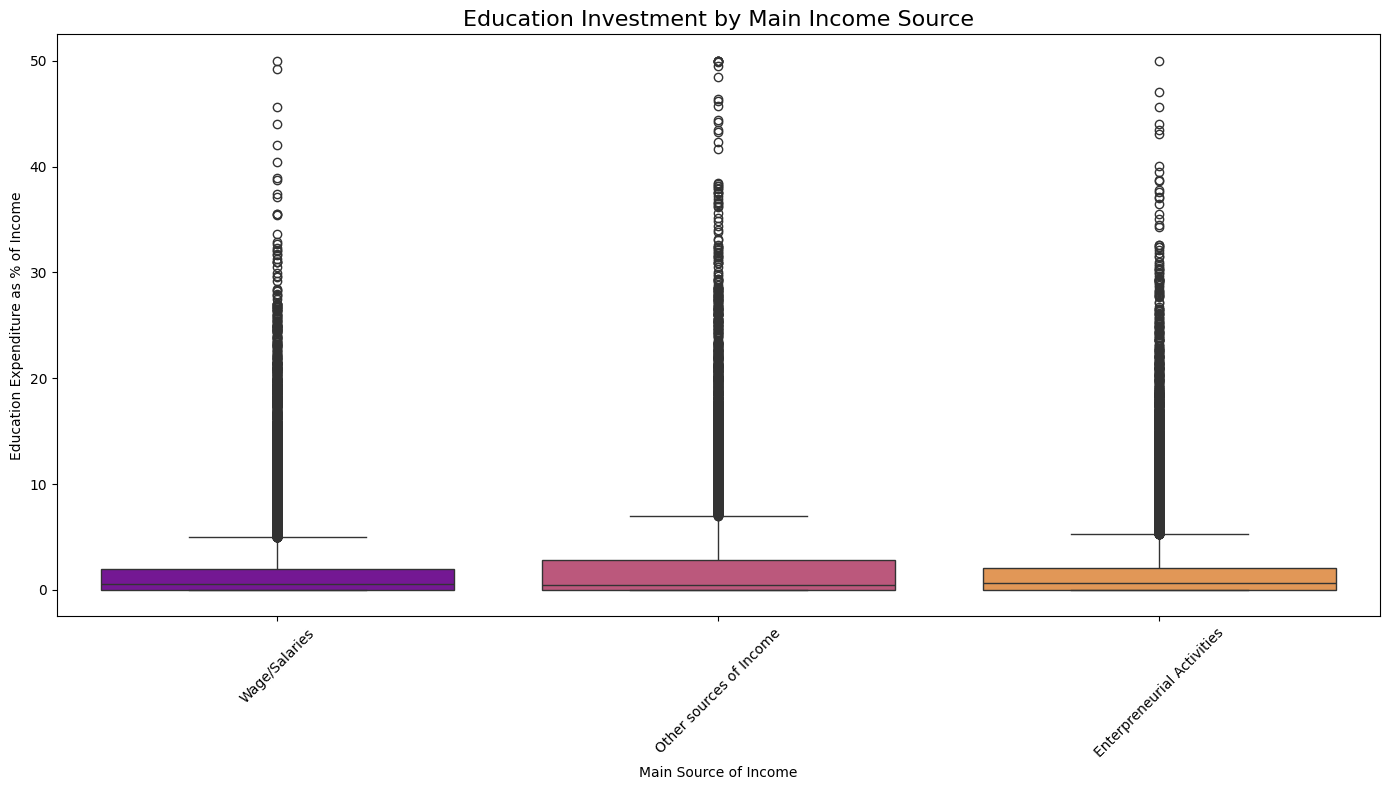

In [23]:
# 16. INSIGHT: Income Sources and Educational Investment
# Calculate education as percentage of income
df['Education Investment Ratio'] = (df['Education Expenditure'] / df['Total Household Income']) * 100
df['Education Investment Ratio'] = df['Education Investment Ratio'].clip(upper=50)  # Cap for visualization

plt.figure(figsize=(14, 8))
sns.boxplot(x='Main Source of Income', y='Education Investment Ratio', data=df, palette='plasma')
plt.title('Education Investment by Main Income Source', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Education Expenditure as % of Income')
plt.tight_layout()
plt.savefig('16_education_investment.png', dpi=300, bbox_inches='tight')
plt.show()

<h1 style="text-align: center; color: red;">INSIGHT 17
</h1>

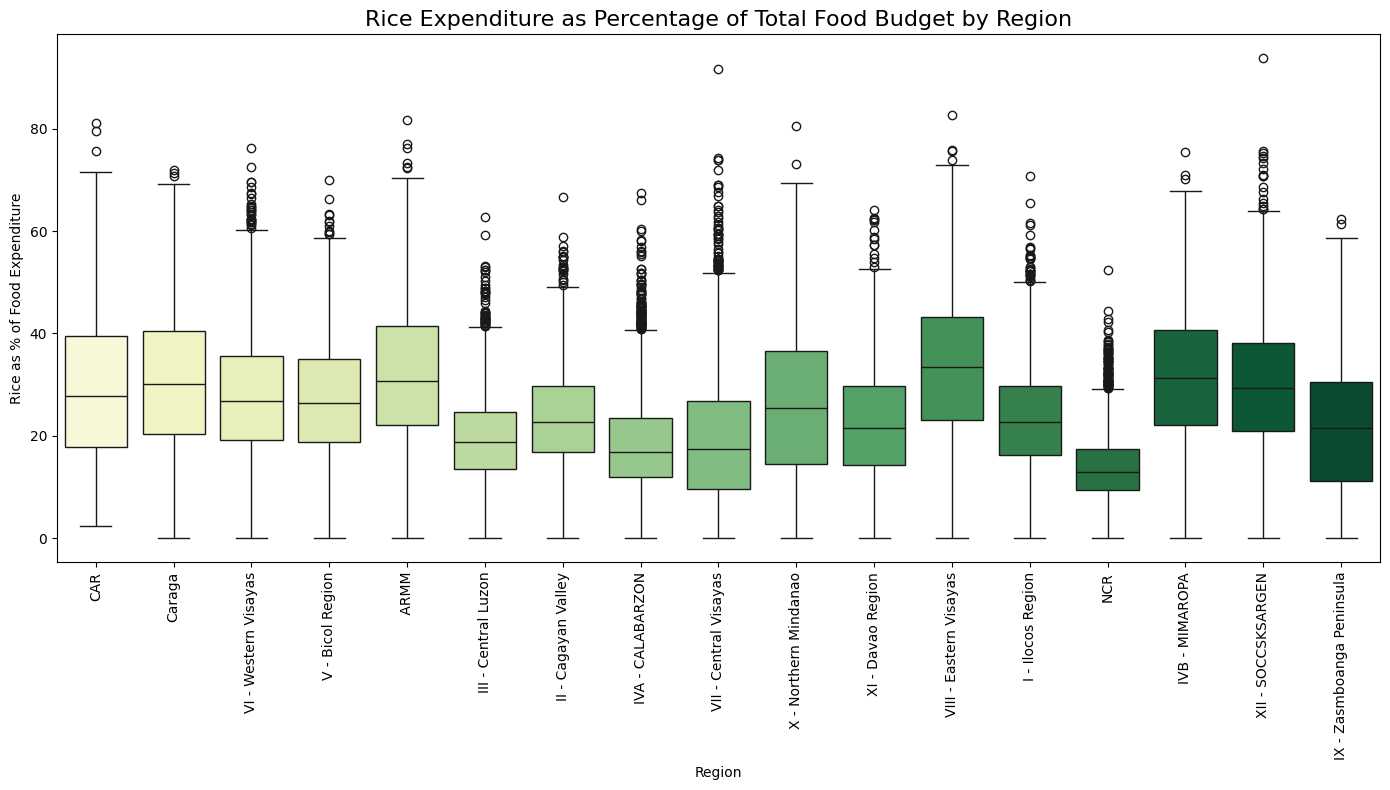

In [24]:
# 17. INSIGHT: Rice Expenditure Across Regions
plt.figure(figsize=(14, 8))
# Calculate rice as percentage of food expenditure
df['Rice to Food Ratio'] = (df['Total Rice Expenditure'] / df['Total Food Expenditure']) * 100

sns.boxplot(x='Region', y='Rice to Food Ratio', data=df, palette='YlGn')
plt.title('Rice Expenditure as Percentage of Total Food Budget by Region', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Rice as % of Food Expenditure')
plt.tight_layout()
plt.savefig('17_rice_expenditure.png', dpi=300, bbox_inches='tight')
plt.show()

<h1 style="text-align: center; color: red;">INSIGHT 18
</h1>

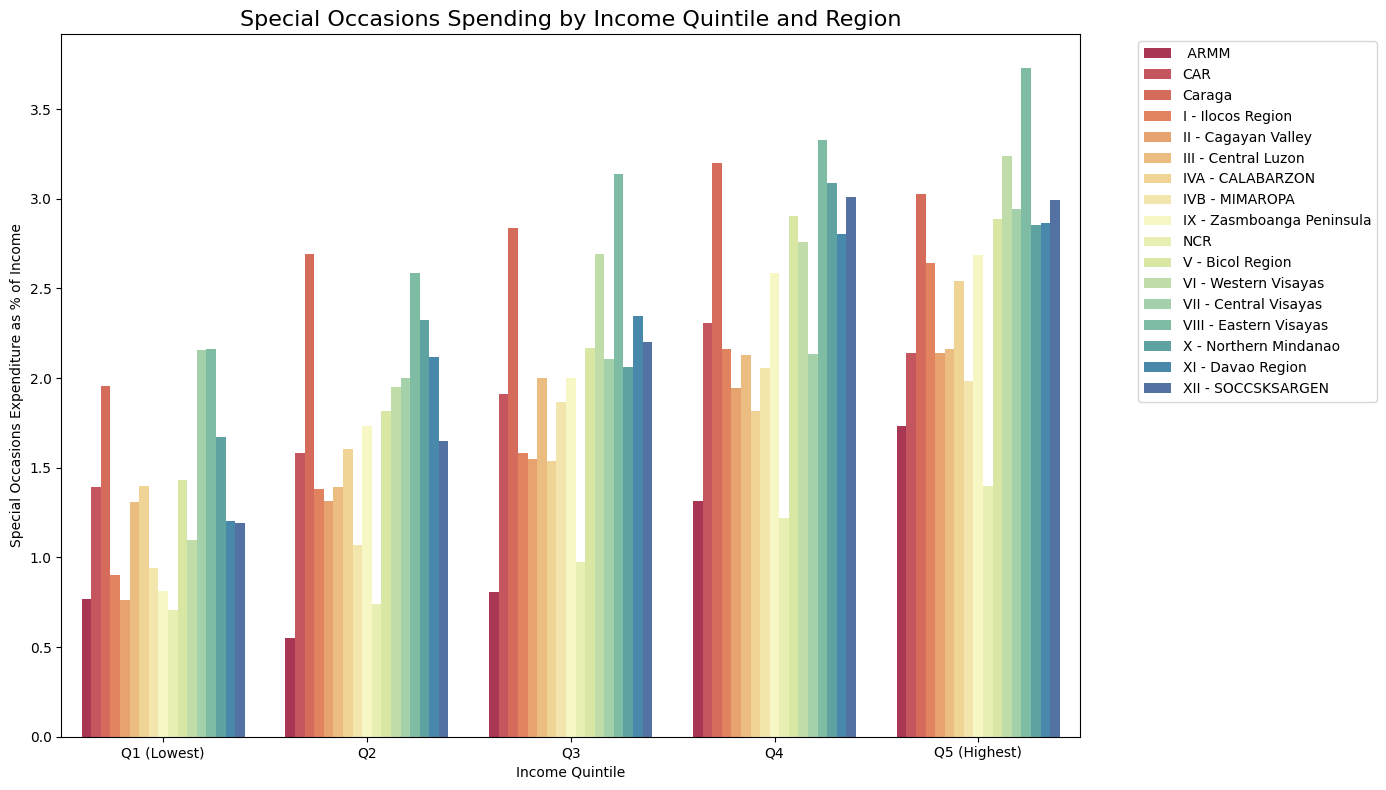

In [25]:
# 18. INSIGHT: Special Occasions Spending Pattern
plt.figure(figsize=(14, 8))
# Create ratio of special occasions spending to income
df['Special Occasions Ratio'] = (df['Special Occasions Expenditure'] / df['Total Household Income']) * 100
df['Special Occasions Ratio'] = df['Special Occasions Ratio'].clip(upper=30)  # Cap for visualization

# Group by income quintile and region
special_occasions = df.groupby(['Income Quintile', 'Region'])['Special Occasions Ratio'].mean().reset_index()

sns.barplot(x='Income Quintile', y='Special Occasions Ratio', hue='Region', data=special_occasions, palette='Spectral')
plt.title('Special Occasions Spending by Income Quintile and Region', fontsize=16)
plt.ylabel('Special Occasions Expenditure as % of Income')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('18_special_occasions.png', dpi=300, bbox_inches='tight')
plt.show()

<h1 style="text-align: center; color: red;">INSIGHT 19
</h1>

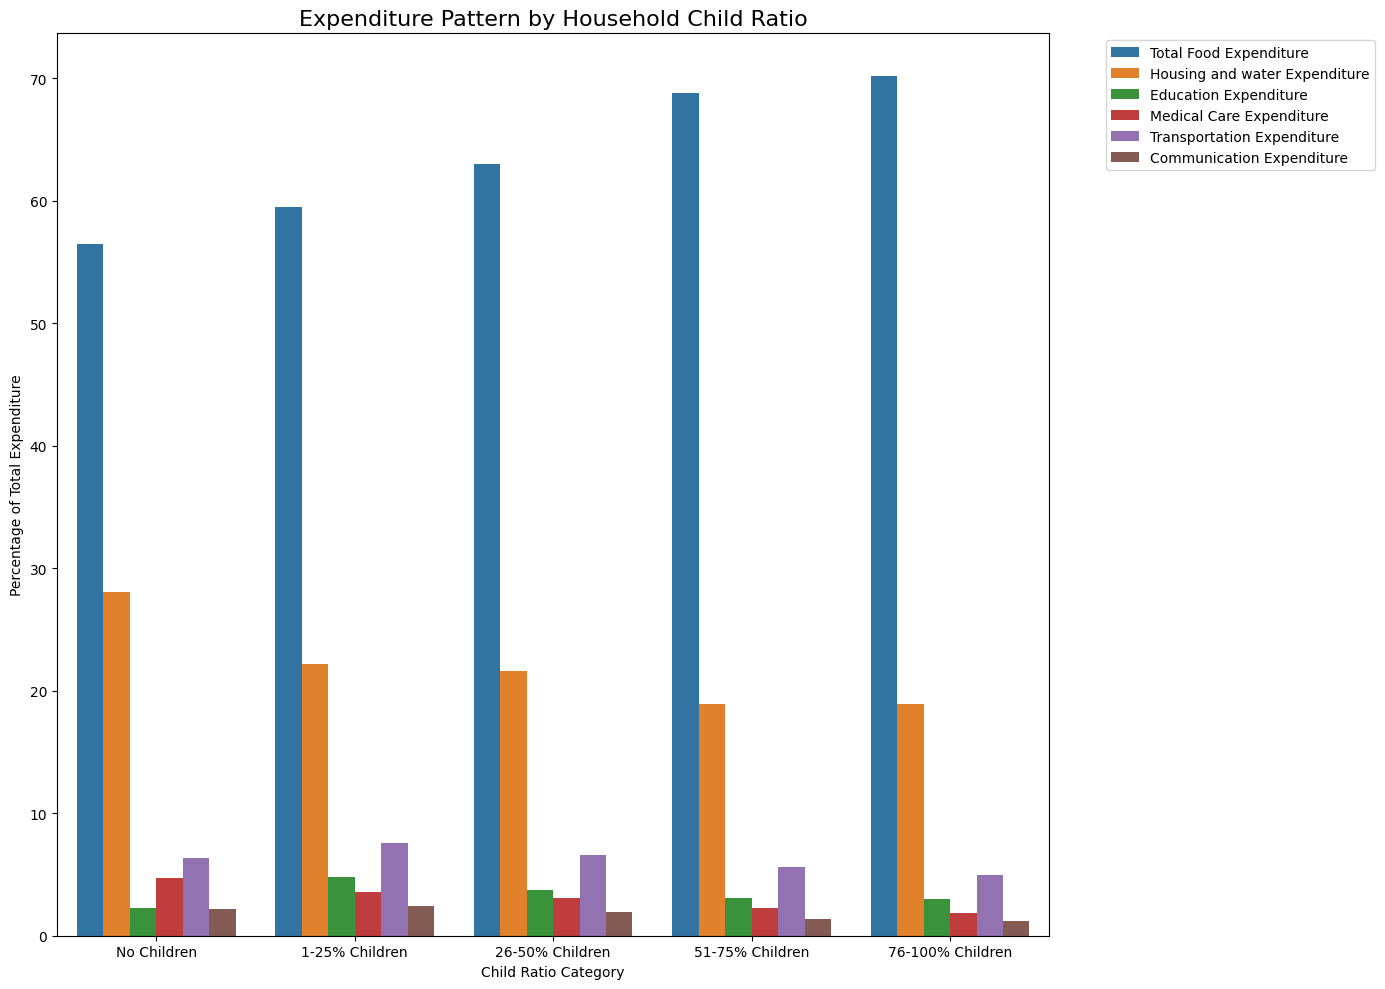

In [26]:
# 19. INSIGHT: Family Composition and Expenditure Pattern
# Calculate child ratio
df['Child Ratio'] = (df['Members with age less than 5 year old'] + df['Members with age 5 - 17 years old']) / df['Total Number of Family members']

plt.figure(figsize=(14, 10))
expenditure_cols = ['Total Food Expenditure', 'Housing and water Expenditure', 'Education Expenditure', 
                   'Medical Care Expenditure', 'Transportation Expenditure', 'Communication Expenditure']

# Create child ratio categories
df['Child Ratio Category'] = pd.cut(df['Child Ratio'], 
                                  bins=[-0.001, 0.001, 0.25, 0.5, 0.75, 1.01], 
                                  labels=['No Children', '1-25% Children', '26-50% Children', 
                                         '51-75% Children', '76-100% Children'])

# Calculate percentage of total expenditure
expenditure_pcts = {}
for col in expenditure_cols:
    df[f'{col} Pct'] = df[col] / df[expenditure_cols].sum(axis=1) * 100
    expenditure_pcts[col] = df.groupby('Child Ratio Category')[f'{col} Pct'].mean()

expenditure_df = pd.DataFrame(expenditure_pcts)
expenditure_df = expenditure_df.reset_index()
expenditure_melted = pd.melt(expenditure_df, id_vars='Child Ratio Category', 
                           value_vars=expenditure_cols, 
                           var_name='Expenditure Type', value_name='Percentage')

sns.barplot(x='Child Ratio Category', y='Percentage', hue='Expenditure Type', data=expenditure_melted, palette='tab10')
plt.title('Expenditure Pattern by Household Child Ratio', fontsize=16)
plt.ylabel('Percentage of Total Expenditure')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('19_family_composition.png', dpi=300, bbox_inches='tight')
plt.show()

<h1 style="text-align: center; color: red;">INSIGHT 20
</h1>

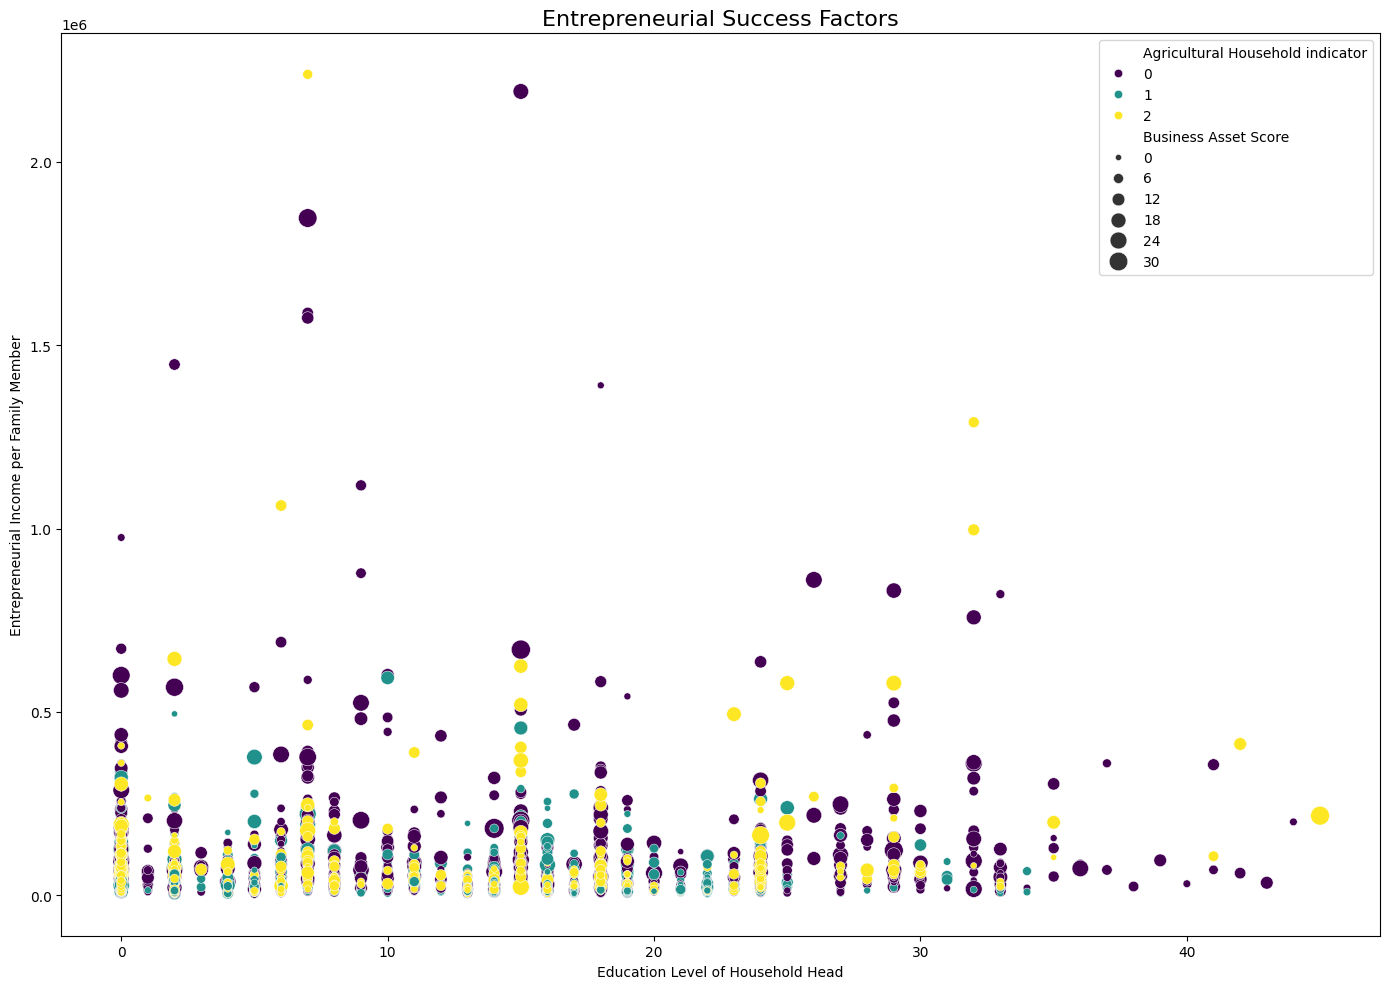

In [27]:
# 20. INSIGHT: Entrepreneurial Success Factors
# Focus on households with entrepreneurial income
entrepreneurial_df = df[df['Main Source of Income'] == 'Enterpreneurial Activities']

# Create entrepreneurial success ratio (income to household members)
entrepreneurial_df['Success Ratio'] = entrepreneurial_df['Total Income from Entrepreneurial Acitivites'] / entrepreneurial_df['Total Number of Family members']

plt.figure(figsize=(14, 10))
# Create entrepreneurial asset score
entrepreneurial_df['Business Asset Score'] = (
    entrepreneurial_df['Number of Car, Jeep, Van'] * 3 + 
    entrepreneurial_df['Number of Motorcycle/Tricycle'] * 2 + 
    entrepreneurial_df['Number of Motorized Banca'] * 2 +
    entrepreneurial_df['Number of Cellular phone'] + 
    entrepreneurial_df['Number of Personal Computer'] * 2
)

# Create education level numeric mapping
education_map = {
    'No Grade Completed': 0,
    'Elementary Undergraduate': 1,
    'Elementary Graduate': 2,
    'High School Undergraduate': 3,
    'High School Graduate': 4,
    'College Undergraduate': 5,
    'College Graduate': 6,
    'Post Graduate': 7
}

# Apply education mapping if possible
if all(edu in education_map for edu in entrepreneurial_df['Household Head Highest Grade Completed'].unique()):
    entrepreneurial_df['Education Level'] = entrepreneurial_df['Household Head Highest Grade Completed'].map(education_map)
else:
    # Create a numeric mapping for whatever education levels are available
    avail_edu = entrepreneurial_df['Household Head Highest Grade Completed'].unique()
    avail_edu_map = {edu: i for i, edu in enumerate(avail_edu)}
    entrepreneurial_df['Education Level'] = entrepreneurial_df['Household Head Highest Grade Completed'].map(avail_edu_map)

# Create a scatter plot
sns.scatterplot(x='Education Level', y='Success Ratio', size='Business Asset Score', 
               hue='Agricultural Household indicator', sizes=(20, 200), 
               palette='viridis', data=entrepreneurial_df)
plt.title('Entrepreneurial Success Factors', fontsize=16)
plt.xlabel('Education Level of Household Head')
plt.ylabel('Entrepreneurial Income per Family Member')
plt.tight_layout()
plt.savefig('20_entrepreneurial_success.png', dpi=300, bbox_inches='tight')
plt.show()